# Итоговая работа

In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

1. Загрузите файл HR.csv в pandas dataframe

In [2]:
df_hr = pd.read_csv("/Users/maksim/Desktop/HR.csv")
df_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [3]:
df_st = df_hr.describe()
df_st[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
      'time_spend_company', 'Work_accident']]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000


In [4]:
df_hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
      'time_spend_company', 'Work_accident']].mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident
0,0.1,0.55,4.0,135,3.0,0.0
1,NaN,NaN,NaN,156,NaN,NaN


3. Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные

In [5]:
df_hr[['satisfaction_level', 'last_evaluation', 'average_montly_hours',
      'time_spend_company']].corr()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.339742,0.131591
average_montly_hours,-0.020048,0.339742,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.127755,1.000000


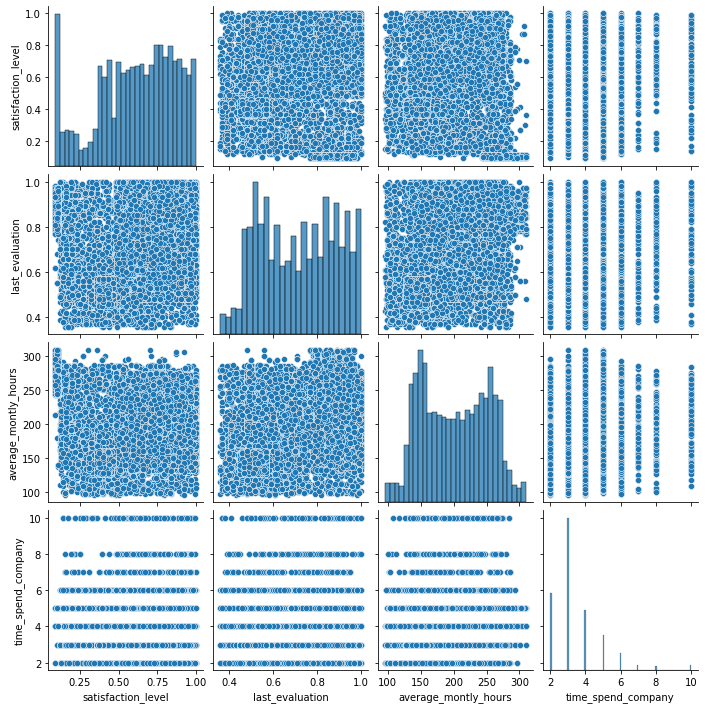

In [6]:
sns.pairplot(df_hr[['satisfaction_level', 'last_evaluation', 'average_montly_hours',
      'time_spend_company']])

### Вывод

* Самые скоррелированные переменные - "average_montly_hours" и "last_evaluation"
* Наименее скоррелированные переменные - "satisfaction_level" и "average_montly_hours"

4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [7]:
df_departments = df_hr.groupby('department').count()
df_departments['satisfaction_level']

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

5. Показать распределение сотрудников по зарплатам.

<AxesSubplot:xlabel='salary', ylabel='Count'>

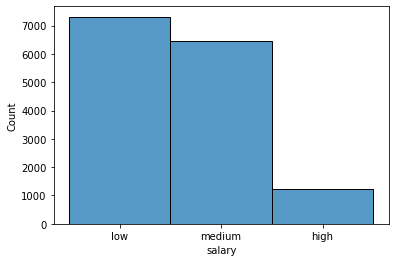

In [13]:
sns.histplot(df_hr['salary'])

6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

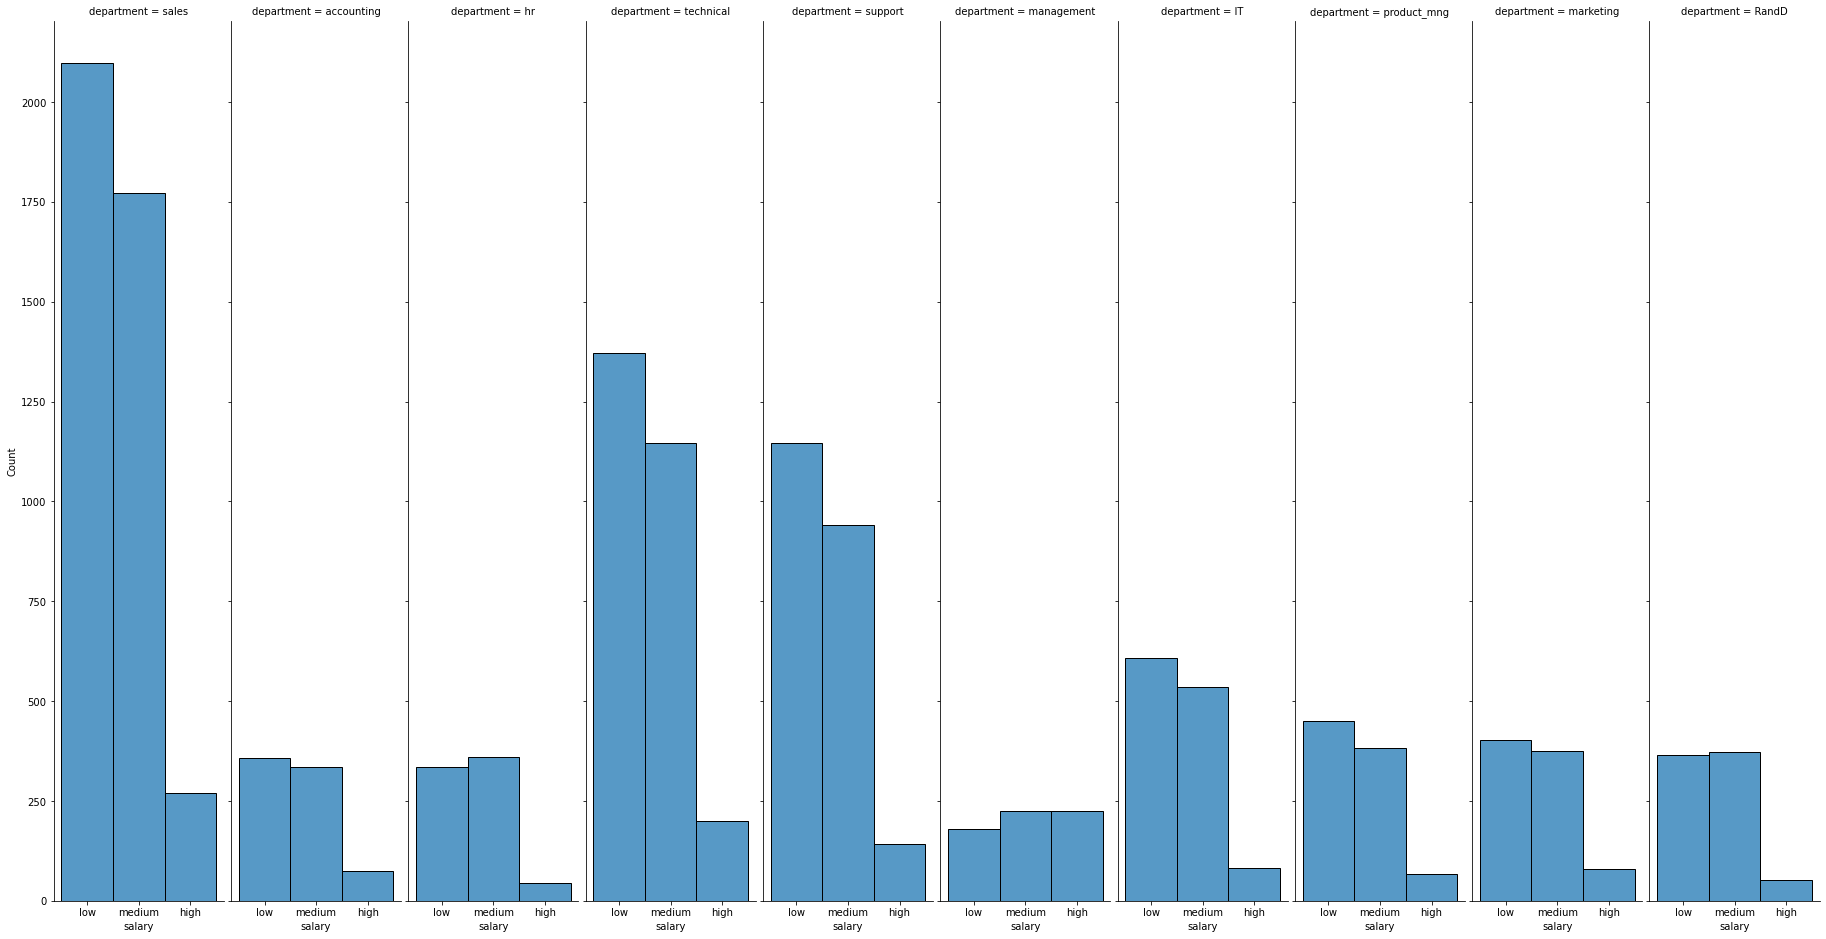

In [23]:
sns.displot(x='salary',
            col='department',
            data=df_hr).fig.set_size_inches(25,15)

7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

* H0 - величина оклада не влияет на проведение времени на работе
* H1 - величина оклада  влияет на проведение времени на работе



In [159]:
df_low = df_hr[df_hr['salary'] == 'low']
df_low['average_montly_hours'].mean()

200.9965828321487

In [160]:
df_high = df_hr[df_hr['salary'] == 'high']
df_high['average_montly_hours'].mean()

199.86742118027485

In [156]:
t, pvalue = stats.ttest_ind(df_low['average_montly_hours'], df_high['average_montly_hours'])
t, pvalue

(0.7288680398062308, 0.4661023478267259)

### Вывод

In [161]:
Величина оклада не влияет на проведение времени на работе. Выборки не отличаются. Эффект случайный.

SyntaxError: invalid syntax (<ipython-input-161-7fac1cad271a>, line 1)

8.Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

 * Доля сотрудников с повышением за последние 5 лет

In [38]:
df_left = df_hr.groupby('left').count()
df_left['satisfaction_level']

left
0    11428
1     3571
Name: satisfaction_level, dtype: int64

In [46]:
df_up = df_hr[df_hr['promotion_last_5years'] == 1].groupby('left').count()
df_up['satisfaction_level']

left
0    300
1     19
Name: satisfaction_level, dtype: int64

In [52]:
df_up['satisfaction_level'] / df_left['satisfaction_level']

left
0    0.026251
1    0.005321
Name: satisfaction_level, dtype: float64

### Вывод:

Доля сотрудников с повышением среди неуволившихся сотрудников выше в 5 раз. Возможно люди увольняются из-за слабого карьерного роста

* Средняя степень удовлетворенности

In [60]:
df_hr[df_hr['left'] == 0]['satisfaction_level'].mean()

0.666809590479516

In [61]:
df_hr[df_hr['left'] == 1]['satisfaction_level'].mean()

0.44009801176140917

### Вывод:

Уволившиеся сотрудники имели меньший уровень удоволетворенности в среднем

* Среднее количество проектов

In [63]:
df_hr[df_hr['left'] == 0]['number_project'].mean()

3.786664333216661

In [64]:
df_hr[df_hr['left'] == 1]['number_project'].mean()

3.8555026603192384

### Вывод:

Уволившиеся сотрудники и неуволившиеся имели в среднем равное кол-во проектов

 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки

In [136]:
df = df_hr[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
          'time_spend_company', 'Work_accident', 'promotion_last_5years']]
df_key = df_hr['left']

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df_key, test_size=0.1)

In [138]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [139]:
lda = LinearDiscriminantAnalysis()

In [140]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [141]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [163]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [143]:
from sklearn.metrics import accuracy_score

In [144]:
accuracy_score(y_test, lda.predict(X_test))

0.776